# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

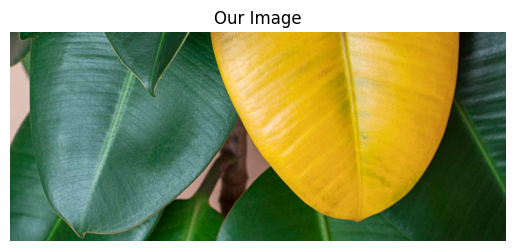

In [62]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [63]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Task 1 - Convolution

In [64]:
import base64
with open("cliff.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHuAuQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6Lpy9qbTl7V/N5++IeKcOlNFO7VJoLTkptOUYqASHHqKeBTQORT6llhRRSgVLAUdKctNpQcVmSx1FFFQIKKKKonqOXpS0i9KWoYMKcOlNpw6UkSwp9IBS02yWOHSlopwFF9CQp/SjFFZkBRilAzTqBXGAZp9JjFLQxMKAMmlA

(494, 740)


(np.float64(-0.5), np.float64(739.5), np.float64(493.5), np.float64(-0.5))

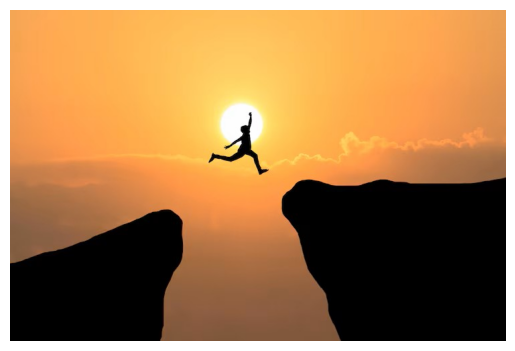

In [65]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image = '''/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHuAuQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6Lpy9qbTl7V/N5++IeKcOlNFO7VJoLTkptOUYqASHHqKeBTQORT6llhRRSgVLAUdKctNpQcVmSx1FFFQIKKKKonqOXpS0i9KWoYMKcOlNpw6UkSwp9IBS02yWOHSlopwFF9CQp/SjFFZkBRilAzTqBXGAZp9JjFLQxMKAMmlApwFAri4FGBS0UEXDGKKAM0u2jUQlFO2GlC4oEIBS0YNLtqgEopdtG2gLiUUu2jbQFxKKdik20XFcYRSVJto2Uh3I6KXbSYxSGFFFFA7kRGKKewyaYRigu4UUUUDCmkYp1IRmgEMam05uKbQUFI3WlpG61Q0NbpTac3Sm0upQjdKY3Snt0pjdKroWJRRRQihlFFFaMYUUUVJQyiiitGNCNSDrRSbsGkUB6U2lJ4pKfQaI2600dTUjDNR4wTWiFYWmnrSk4pp6VSGxh6U2lamk4rRGY2kbpS00nNNbiYxutFD/AHhRWyIYymv92nUxzmmSxh6U2lakrREMZRRRTJNanL2ptOXtXIboeKcOlNFOHSpNEPxilHWkpR1rM0SHZxRSHqKWpGOBzTx0qMHFSA1LJYUUUVBA+iiioAKKKKonqOXpS0i9KWoYMKcOlNpw6UkSx9KopKcKm5DHAUtA6UUXJsPpQM0lPpEsKKKKCQpQKAKcBmgTFApaKUCggAM0oFPHSigi42lApaKdwuFFFLikSJS4NKBilp2Fcbto20/bRtosFxm2jbT9tG2iwXG7aQjFP20YNOwXI6KcVpNtTYdxpFJTqCKoq4wrTSMU+kPSlYY2iiikUNIxSU8jNMoGNooPWigsa4zTCMU9qaelPoUhtI3WlpG60xoa3Sm05ulNpdShG6UxulPbpTG6VXQsSiiihFDKKKK0YwoooqShlIxpaaetWWITgU2lbrSUFIKKKRulNDEPWmHrTqaetWkOw0nNNalpp61aIYw9aZTj0ptaIzEJptFI1NbiYw9RQTQ3WkrZEMQmmN0NLTXPFMljKaTmlJGKbkVoiGFFGRRTJNOlHUUg70DrXns6kWB0pw6VGp4qQdKDRC0q9KSlXpUFj1paRaWp6iFXrTh1plOHNQJj6KAeKKCR9FIOlLUEhQOtFA600Jj6KKKzJHDpT6YOlPpvYhjh0pR1pB0pR1qCR1PplPoEwpw6UgFOoIYoHFLgUDpTgKDMWiilAzQJscoyKdjFA6CigzCiilAoEAGadSgUuBVCEwaULS4NKFpE3EopwHpS4NMVxMCjAp2BRgUE3G4FGBTsCjAoC43AowKfik20DuRkUmBUmDSYpDuRkYppFSkU3FMpMiIpNtSEUm2gq43FMcc1IRimsKkpEdNIpxGKKC0Mpp606mnrQUhrdaSnEZFNoNEMpG6UtI3SgpDG60xutPbrTG60FiUjUtI1UxoSmU+mUkaIKKKKYxrdaSlbrSUyug2iiitBjT1pKU9aSmUMoPSig9KspDM80h60vekPWqKQlNPWnUw9KaJYw9KYelPamMa0M2MbrTW6Up600nJpoTGt901HT36UytlsZsavWgnmgHFNPerQmIW4pu6hqaTitEZMduopm6iqINUd6VTmkxigda85nUicdKeDxTB0p46UjRD6VelJSr0qCx60tNU06pEFKDSUDrUAPB5p1Npw6UEjl6UtIvSlqCAoHWigdaaEx9FFFZkjh0p9MHSn03sQxw6Uo60g6Uo61BI6n0yn0CY+iiigzHqKdSL90UtBAoGacBSDpTl6VRAop22haWkkZthinAUtKBSIuAFLtz2pQM06qE2JtowKWlxQTcSil2ml2UCuG32o2+1PooJuM2+1BX2p9FAXI8GkqWigdyKinkYpD0oHcYRTCM1JTT1oKTGUmBSnrRQaDKYR2qUjioyKBojIptSNTGpM0GkZqM9alqN/vUjRCUhFLRQUQ0jdKWkbpQaIY3WmN1p7daY3WgsSkalpGqmNCUyn0ykjRBRRRTGNbrSUrdaTIplDaKKTIrUYh60lKetJnFBQyg9KKD0qykM70h60vekPWqKQwnNNalpp600Sxp61GT3px6U09K0M2MJptK3WmtTQmNPSoyc09/umo8ZrZGbEByaRutC9aD1NWhMYetMpx6U2tEZMKKTIoqiDZpw6UwHNPWuBnaiQdadTB0p9QaIfSr0pKVelQUOHWlJwaQdaG61Ah1KtJSrUksdRRRQSOpy02nLUsgWiig9KgBV604daZThzSZLH04dKaDxSg4oIJaVaYDg08dakkcOtS1EOtPBoM2OoooAzQSSL90UtIvQUtBDHL0py9KaOlPA4qWZscOlKOtFA60zMlooopkD1HSnECkUcU6kiRlSKMUBQKWrJbClpQufangAUEXE2CjYKdRQK43YKNgp1FAXI9tNqamMncUDTIyKaRmpMYpCKCkxmKjIxUtIRmpLTIqCM0pFJQUMwKaetSEYph61KLIyOKbTz1phGKRYymnrTqaetBaGt0pp6U5ulNPSg0Qw9KY3SnnpTG6UGgxutMbrT260xutBoJTT1pxOKbWhSGtSUp600mmaC01+lOpjnNA0NpDS0h6UzRDSxxSA02lqwAnNJQTgUVaLA9KYelLTSc1Q0JTSaUnFNJqi0KeTUb9aeTio36VZLIz0ptK1NJxWiIY2mE0pNNY1cSWNPSm0E00nNambAnNNalJpjGiO5EthpNMpxNMLVsiA3UUlFAG2DinjrUdPFcLN0SLTgcUwdadWZoiXdTlORUdPTpUFjx1obrQOtDdagkdSrSUq1JLHUUUUEjqctNpy1LIFoPSig9KgApy9KYtPXpU9BMUHmnU2nDpQiGPpwNNBzSrSJZKOtOpg6U+ghj6cOlNp1Bkxw6UtIOlLQQx69qeOtMHWpF6UjNi05RTaeO1MzY6lHJpKcozQSPHSloApQOaDNjqcqetCin1RmFGKULT9tBNxuBRgU/FGKCbjMCjAp+KMUBcZt9qQrUu2mkUBciK03b7VKVpuKC7kJFIRUlNIxUl3IyKYwqVhTW6UFpkVRnrUtRuPmpGqGNTGFPPSmnpSZaIz1ph609utMPWhmiGt0pp6U5ulNPSkaIYelMbpTz0pjdKDQY3WmN1p7daY3Wg0GHrRQetFWWMY4plOf71NoLHE0xulLSNVFoSmsaU9KaelMoZRRRVFIQnmlPSm0E1ohjWpueaGNNploCabSnrTD1qkUOJzTHp2RTHNaEMjPWmE04nimE8VoiGMJpjGnMaYelaRJY1jTCaVqaTitDNgTimk0ZFMLUR3IlsITTScUFqYTWyIF3+9FRk0UAdAtSVEpqQGvPOlDwc1InUVCDUqGg0Q89ace1NzkmjPFZ9CyRTS0wGnZyKlkDwaWmBqcDmsyWhy9aUnmmg4ooZNh9OFNpVNZCHjpS00GnUiWFKOtJSjrT6CHU4dKbRUEDx1p461HTwaCCRacOtMHWnjrQSOqRetR1IvWoMmLTh0ptOHSgzZJT160ynr1qmZyHDrUi9ajHWpF60zNjwOlSU1adSRkxyingc0i08DimZtigU4ClApyrQZtgFp2BSgU4JQZNjcGjBqXb7UbfagnmIsUYqXZS7KA5iHBoIqbbTStAcxCUppWpWXFNIzQWmQkUxhUxFMYUGiZC1MqVhUZFBsmRnrUbdalbrUT9ag0RE/WmnpTn60xulI3Qxqa1OPWmHrTZaEPSoj1qUnANRUGiGUjUtNY9as1RG3SmMac1MoNUFFITTWbigoM5JptFNJqjRICaSk3U0mmXYDyaQmkJpu6rRSQpOKbnmkz70bhVFWAnFNPNITSFxWiGkHSmk0FqbuyaRaQtR9acWpharSGwLVG7UFqjdq0SEw3c0jP2phOOaZu5rRIzY8n86jfpS7qjduDWqMmNY00mkLUwtWyMxS1MLUhamFqSRmwZqaWpCaYTWiQh26im7qKqwHQqalBzUK08HNeWdKJAcVIhqFTUiHpQaIlzkmnA1H604GsjQeDinA5ptFJkj6cpqMHmnDrWYmS9aKatOpECg06mU4GsxD+tOBqMdadSJaH0o6img0p4oIY+ikPSgdKkgcDmnrUY608daCWSDpTwelRrT1oJZJUi9ajqRetQYsWnDpTacOlBmySnr1plPXrVMzkOHWpF60wDJp4GDTM2TL90Uo60i/dFOWkYsetSr1qMdqlHSmZMeozTwKRelSKuKDFsVVqQJQoqVRQYNjQppdhqZVFPEdOxk5FcR0vl1Z8selGwY6U7E8xVMdRslXSgxUbJ7UrFKRSK0xkq06VEy0rGykVyM1GwqdlxUT0G8WQMKjbvUz96ibvQbxIm61E/WpW61E/WoNokT9aY3Snv1pjUjdEbHrTKc1NpmiEao6ex5NMJxQaIYaY1OJ4pjGrNkRsaYTinMaYTmgtCU09aUmm0GiQhNNJxRnqaaTVGqELU0mkJpp4FMsUmm7qSmk1aLSF3UmaSkJ4qigJpvSgnkUjGrRSQham5oprGrSLsBamFqGNMJzWiRDAtTGNBNMJrRIliMc03dSMaaxxWiRkBamO3FBNRueKpGbGlqbupCeaYTWyMxS1NJoJphNMiQhNNLUE0wmtUiLjsmimZop2J5jpA1PBzxUIb8aejc15jR3EwNSK3HvUOe9KGrNo0RZzS1GGpwaoaLJQadUQOKXdUhYkp6tUQf3pwakS0S5xRv8Aeo93rS5FQybD6cDTc0A5oZJIDinVGDTgcVmQ0Oyafnio80oOKgTQ8HFOplODA1JDRJTgeKjDU4GggkU05ajBpytQQyZTTx1qJTUimoM2iYdKXpUaHtT6DJjx1qVahBzUimoM2icdKeABUamng4pmLHp1qZO1RVKpq7mLJVqVetQr1qZetFzBkqdanUZqKMVYQcUjmkxypkVNHD3NEMfc1cjQVqjlnOwyOHIqdIO1WYLZnAAGK1bTSyccGvSw+Cq4maVKLZ51XEKG5jrZk9qVrI46V1cWhP8ASnPoLnpivolwzjpR5uQ8+WPinucZJaEdqrPCR2rr7nR3QHK1kXVhtJ4xXgYnL62Gly1ItHbRxcZ7M56SOoWWtOe3Kk1TkTFeW01oepCdyk4qu44q3IuKryDms7nZFlZ+lRN3qZxULd6VzqiQt3qI9albvUR61mzeJE3eomqVu9RN1qToiMPWo26U8nio2qjZDD1prHilprHmmaIaTUbGnk1G1aGqGE0h6UU1jQaIQ9Kj/ip7HAqOmaoCeKZTmppOK0RaG009aUnFNplIa1K1JQ5rRFjKKKTuKotCNTWpx60wnJqikB61G3SnnpUbVoiiNj1ptKxphNaIlinpTGpaYxqzJjGNMJpzGoya0RmNY1E1PY1GxrSJixpPNMpSaaWq0QxCc01jSk0xjWpkxCaYTmlJphatEQxaKTdRTJOjzmgNiowafXmNHoImV+PelDc1Cpp4ODWbRoiyG96cGqEHNPU1DRqTBqXJqMGnHkVmy7Dwc05TUadqfUEsfnIozSUVHUkkzilBzTaAcUMglBzS5xTKcDmoIsO3ClzmmUoPNZhYkVscUoOKZTs1BDRKGzSg4pg6U5TTMmiQGnK1Rg09etBLJVNSKahHSpAe9QZtEtODcUwdKWgyZIDmpVNQ1ItQZtE6mpAc1CpqVaDBky9KlWoU4qVO1JMwZKpqZagWp0p3MZFmOrCdBVeOrKDpTTOKZeiQcVp2lsJGxiqUEe7ZXT6HYiSQZ5r28uwk8dWjRit2eLiqvs4tlzStKMm13HyjpW+kSxKAoApVUKoA4ApO9fvuBwFHAUlTprXq+58fVrSqPUcOlFFFekZBWff6WlwpKja386+X/wDgo58X/iZ8Evg3pniX4eTS2FvBqS/2zqUEEM7w2+PkTbIrBRI+FMgVtuRkfNkfT3hnUG1fw3pN86TRvdWkU5W5CiUFkBw+0AbuecADPYVzYjC0sXTdOsrpmkJuDujkdSsjC7AisW5jxmvQtb08TRmRRyOtcVfW+0nivwfO8slluIlHo9vQ+rweI9ojDkGc1WcdauSjBNVJODXyzZ9BBlZxVd+pqy9V5KVztiyBu9RHrUrd6iPWhnREibvUTVK3eoW71J0RI261Gx61I3WomqjdDaY3SnnpUbGmaIY3WmMetPbrUbdK0NUNph6U5jgUwkUGiEY5FMpxPFNpmiGnrTW60ppG61ojQjpD0paQ9KZY2kalpGrRFCU3PNKelNpliE8U2nNTapFIRutRsetPNRtWiGRsaZTm700nFaoljSc0xjSk0xjVmTGMaYTmlY0xutaIzGsaiJp7Hn8ajPWtI7GLGk0wnFKe9Nq0QxCcU0mimt1rUyY0mmk4oJptaIhi7qKSimSdCDg09TzUIang15zPQjuTLTwahBp4NQzVEw5p4NRA08GsmaEoNPB61EDTw1Qy0PHSnrUY/WlB/OoCxIOKB1pAc0A1LRNiQGnVGDTgakhoetO4xTKXJoJsOpwPFR7qcDUMlokU0o60wGnbqzZJJTlPNRq3FOrMholpQeajVqfnNBm0Sg5FPU1CpqQGkzNolU9RT6iBwaeGzUGbRKOtSIahDVIrVBm0WENSLUCmpVagwaJU61MlQL1qdDUoxkTJ0qaPoKhQ1LHVHNItxVdi/hqlFV2L+GmtzhmbNlHvda7bQbcJbsxHXpXEaefnrvtG/wCPEV+n8G04yxEpPdI+QzOTSSRexS0DpRX66fPhRRXyz8bv+ClHwR+CWp3ukXGuXPirXbN/Ln07w5ALgxvu2srSsyxBlwcrvyMYIzQBw3/BXT4mP4Q/ZhHhe2cpe+LdQS1JWQoVt4P9JlPHUExohH+3zX1t8KbqW9+GHhG4nG2eXSLSRxnOGMKk1+TX7Zfx98L/ALeXxb+CnhfwGmtNFK7WU6XNm0UkUl5PCjcYZTthikYuMqASexr9iLKzi0+zgtYEEcEEaxRoOiqBgD8hTQ0PlTejA9xXDaxB5ZcdDmu8PSuI14/6RN9a/O+MoR9hTm972PWy9v2jRyk4xmqMvetC4PFUZcYr8VZ9rTZUfg1A3ep5DVdmpHfEgeoX+9UzmoD1pM64jHqButTOeagc0jeI1qjfvTi1Rk5qzdIY5pjGlY5NMZq0RrFDWPFRk0rHNMY1ZqkNY0lFIelM0Q2kJoJ4qMnNBogJyaQ9KM0E8VZZG3WkpW60laGgHpUZNPJ4ph60ykJTKcTim1okWgPSm0E5pCcVRaEY1ExpS3NMJzWsUSNY1GTSu3JqMtWqRncCaYxpC1MLVSRnICaaTikLUwtWiRAhwBTGPNDNxUZbmtTN7CsajJoLe9MPX3qjG1xSajY0pJxURatSB5bmk3UwnmkL471ZA+io949aKAN8GnBqip4615zO2O5MDTwaiWnLUM1RMDTw1RDpTgayZoTBqeGqIGng4qGWiYNS7uKjBp2eKkokBzS0wHinHkUMQ/OaUHBplO61kSSA049KjBxSg0ENDt1KDimU5ahiaJAaXdTAadWbIHg09WzUY6U5cg5rIhokpVbBpKKEyCWnK1MByKUdaGZ2J1NKDg1GpqQc1mZtDwcVIrVHTlNSZtFhWqRTUCmpAaDBosq1TI1VVaplPNSjCSLKtUwPeqqGp0OKZzyRchk4q9E/SsqNtrVdifpTvY46kTfsJMMtd54fm3wFSelea2k5BHPSur0HUzDIpzxX2XDOYxweMjz7S0PlsxoOcHY7WimpIssYYGlzX70nc+TGzKzwuqHaxUgH0NfzO/Hnwnr/AIK+LXivRvE1k9jrVnqU63UTjB3PI0qtjHRldWUjgggj2/pU8R+I9K8IaFfa1reo22k6RYxNPdXt5KI4oY1GSzMeAK/CP/go7+1Tof7TfxhtrrwrDIvhrRrEWFpc3MBhmu2L75Z2U4ZVJEaorc4QkgbsBgL/AMEtX0kftj+B11G3mnnxem28sFlWf7K/luwDDAVfO+YggFh6gj97K/Bn/glj42uvCf7XvhC3Q26WWrrd6TO0oO4CW3aVdvuXtYx/wI+tfvNQA2RtkbMewJrz7VpzI7sTyTXUeItSEEXkqfmPWuDvrrex5r8e4xzGnWrRw1N35N/V/wCR9HltB/G+pSuXAzVCVxU1w/Bqk7c1+Zn11OOgyVutVnbinytVdjSO+ERHaombFOJqFzSOmKGs2KgZuae5qInvSOiKGlqjY0pOaaxqzZIYxxTCaVjk1Gea0RskFMPen0wnJ4q2WhjCpEtJpIjKsTNGP4gK09FsUllczx7sDhD/ADrfhMKr5URQBR91e1Lm1OSrivZvlirnCMc0w9K1tY0l7dzJGPkY8+1ZPtWkT0Kc41IqURpppOaUmprewmufurhf7zcCtLpbmzairsr0m6rsulzxIW+VsdlyTVHaSCQCaE0xxlGWqY3dTS3NITg0wnnrWqRskLupCaQ00mtC0gZsUwvmms3FR7utNFClqazYFNJprmt0jMazVGWpWzUZ64rRGQFqYWpCaYTVpEMC1NLUhNMJx7mtEjO44nPSmEc1o6RGhDM33/7tXIoEty0iD5j2qHVUdLGkaTkr3Ma0sXvHc5C7f7wrSFuxQR5G0Cqr3skUr5LLu/vCrFtIrts3c7amTk9RxjFaIyL3ak7olVCcirl3atJLM6diRVLBAxiu6LVlY4ai1GE8UwtQ+RTM5NanOGTRUghyM0UCsbyuKkDVUDCnq2K89o9FMthqeGqqHp4es2i1oWsinA1XD09XqGjRMsg04Gq4enh6zaNEywGp6mq4enq9Q0UWM04Golanhqkdh4PNPBwKhDVIHqWiWh2achOcVHvpwbIrNolokpc4poNKelSSPpdxpq9KWoIHgg04dqiBp6moJaJaKB0oqTMfTkPNNoBwc0iCdTipAahByKcpqTNomBzT1aolNPB5qDJolVqkVqgp6nNSZtFlWp4b0quDUgaoMWi1G9Tq+KpI/NTK3pTMJRLqPmrEUnOKoRvxU6SZp3OacTUil59K1rK8KEc1z0cmKludUFhZT3Hky3HkxtJ5UK7pHwM7VHcnoB60RvzKx59WlzLU9I0XXfLIRmyh9a83/ae/a/8ABP7L3haO+1p5NU168Rm07QLN1W4uQv3nZm+WKJe8jcdgGbCn438W/tvfFbW/HN34N+GHwuOs6rC6K15qdrcxCHeCR5sWQkYAH3mlw2DgDpXonwU/Y2jj8SXXxC+Nd/b/ABF+Id/MtyI7hN+n6bgDbHHGeHKHcFJG1R9xVOWb9ey/N8RklDkzZrb3Yp3m/ktl6s+MrYaGIn+4Xq9l/wAE8Xuvhn+0r/wUh/s7xBr17Z+BvhjJIZLC3dpIrUxnkTJbD95dMAAFmkZB1KBR1/P749/Ct/gp8X/Ffgg3M1+mh3z2S3k8HkmfaAd+zJ25DA4yeCOTX7zfHz9ou1+AXwb8QeLJxHJLY2xh06zOF+03TDbDEox3bBOAcKrHHFfz7+OfGmseP/FeqeINf1CXVdZ1C4e5vLyYgtNMxy7cAADPAAAAUKAMCvvMszOjmtH29BO17aq2p5VWjKi+WR6H+yD4l/4RH9pX4baqQGS38RWBcH+68yxMfwEpP4V/RTq+tpaKyIcv6+lfzJeBL+50zxfpN1aKWuIry3kjA/vLMjL+oFf0UTak8y72bJNfLcVZzWyynCjQ0c769rW/zO/AYRYluT2Re1HUmmcknJPesSabJpkt0W71UklJr8OlJyblJ3bPtqNBQVkgllLGq0kmKJJKru+ag9KEAd81CzZoZs1E71R1RiK74qF2oZqhd6RvGIM3Wo2bPFIzU0nApm6Q0nmms1DNxUZNaGqQMetNzigmoyeaq5qkOZhmr+hweZeLIyBow3OazSam06cxTAEkIWo6Cqxbg0jrZ41gZmRQNw5NYbamLRpFj+961q3ZBtGK5KsODXJTnyZSv60krnnYWmpp8x0FvqDXEGyTpWTJo0xlOAoRuQ5bpUUWoKEKHrUQumaT1qkmtjthSnTb5NB8uiSqTuKkY7Gr+Ta2iDPQU2M+Yq5YjimXk6RxEGQcCndy0YOUqjUZalSTUjIcIKVWkeEluKzhciJs4q7HexyQfMcVbi1sjqlT5V7qKN1DIzfKu7/dph0+4RNxX/gI5NPu9UjiXC9RVeHUDO33wP8AgVbrntex1x57EEsu3g9feoldpDhQWPtVm7NrNOCbgK2ADjrmnWlmLOZ5Wk3KOn/1xXVdJeZfPoRPp8wbllP0aqU+6KTaePxp1zrji5ZNuFB61YubZNRSORJPLyvWmuaPxEptkj28NqMyAu/rmlyLyPbhFHbHWotQuYGUoWG/2rnpb4wttVgPoa2hSlNXW5Dmo7m8+nk9JRupkmlyou5ZAX9K546pJ5m8SYI96sL4jlUcuCfetfY1VsZ+1pvc1k0tV8szeYZH/uHhfrVho7SJ3VhEAOx/xrAfxNLjBO7/AGh2rKudQEmcEmrjh6kn7zsTKvCK0OkubJ2bdborRnHQ1nPFJ9oCFSj7sAetZUWtz26BRKwQmtq08R2szIbh1jKjIY960dOpT6XJU6VV72JY7O4gJLFYfctWrayIVGJhI/cZrjdQ1sNOSr5z3FQ2GsC3vA7MeauWGnON2KOKpxlyrY7G+WOVGLHBrIW8jtmxnkVmanrRlcbDhTWXNqKsDjk1pTw0nH3jGrio83unUS62hHaqcmqI2eBXOG+BFRm+ArpjhbHHLE3Nqe7ViajSYFs/1rHN+KBfgVt7J2MfbK50yzRY/wBZRXNf2ivqKKz+ryNPbxOx3YqRJKrb80u7BrgaO9Muq9OD1VV808PWbRqpFkPT1eqwbNPBqGjRMsh6eHqupNPUE1m0aItbsjNPVj61CsTFaesL1i0bJk6scDmpATUSQtjrT1jI6tWLRqSKcdqeDTFVe7VIFX+/SJYoOaeD7UwBc/fqRSi/xVLRmw3n0pQxPaneeg96DdRjtWZGvYcOaXGaYNQAPy/L9KeupD+Ibv8AeqLS7EtS7DsUqg+maQaoAchVFKdWf1/SptLsRyz7Euxj/CaUIwP3T+VRpq0mPvfnUq6tIOpXH0qGpLoZuM+wu0+lABFSrq4x8yq1PGqQE5MK/hWd32M/f/lIvmUcU+EM/apf7ThI4jFLDqqKfuCpd+xD57fCMBwcVIhzVlJrafqgzU6JF/D8tSc7nbdFIMMdaep5FW47S3BxkVaSW3I8v5akylVXRGdSg1eezhI+UbfpUD2kg+6N/wBKghTixqHGKlBqKK2lk48tqnNrLH/B+ZoJk43tccrYArM8WeNdE8BaDPrXiLU7fSNJt2VZbu5bailmCqM+pJA/GtDBA5r4S/4Ke/FK1j0Pw18P7OaVtTef+17xYjhY41R0hDepLFmx6R59K9fKMv8A7UxsMM3ZPVtdkebjsR9VoOru+nqffUNzHPEksTrLE6hldGyrAjIII6iplnGa/G6D4M/tH+AfDdhf6fpPjDTtO8tXtm0e8lkaNGG4HyoJWaMfNnBQYyfeurf9tj9oX4WpZ2PiS4dZGjzD/b+ieVLKoPXLCMv6E8/nX00+EKlVJ4HFQqL7vy5v0PDWbxh/vFKUPl/nY/WWwtbTTzMbW1htjPI0svkxhPMdjks2BySeSTzVq81e20qxnvLy5is7OBDJNcTyCOONAMlmY4AAHc1+Z3hz/gq14p0qxSLxJ4F0vVbrcf3tldS2RK54JRkkGfo1eEftE/tleO/2iQumXrw6Z4fSTzI9F01W8liOQ0rN80rDHGQFB5C55qMJwbmNfEcmJtCH8107+i3++xlXzbDRheGr7Hpf/BRr9pbw18a/FXh7SfB2sz6ro2jQTiaZI2S2kuXkVSyFsbwEjID4xhjtJBNfGkcTSthccckkgAfUmvRPhJ8A/HHxw1M2/hXQ7rVFWQLPdjCW8OcEmSZsIvDA4yW9FNfpN+yh+wfpHwQmHiHxc1n4h8WEEQRxqXtLEFcErvA8yQ5I3kAAHCgck/omIzTL+GcJHCxlzSitI3XM/Xt629Ox4NLB4nMantWrJ9eny7n5RaRql74b1S01Kzke3uraVZoJ06q6MGVlPTIZQe/Sv1B/ZC/4KF6f8QodP8JfEq7g0zxMxWC21plEVvfvjhZMDbFKeeeEbttPy16x8Tv2K/hJ8T4J2m8MW+ganIGK6joSi0kDN1ZkUeXJyAfnU9/U1+X/AO0f+zdrH7NHj210nUbuLUtNuo/tNnqUK7BPCGCtuQklXGQGXJHIwSDx5X1rKeL6f1eScKq1V7cy9Hqmu6/DqdEsPi8plzrWPXsft5JLknFRljivE/2OvFMvi39mjwFfT3BubmOw+xyuzFmDQu0WGzzkBBXsTPjvX43iKTw9edCW8W19zsfc0rVIRmuqT+8fI9QO9I0lRM2axR2RiBbqajL89aCTimtHIq7yjBP7xXimbJJbjXaoWO41IeQa1LfSI7VIp7iXa/3xGTgY96aHKpGmtdzKltZ4k3vC6If4mUgVUJrXvdalNyxjm2hzyvUNUks0Wo27CbyxM4ysw4I9jV6DVScUnOO5h0w9a0I4bO1nAlkFy3ZF4X8TWvbPBdWMiyQpBGTsyvH5VfNYudfks1FtHLFuKZVu70ue03MyZjB+8KjGn3EiZWInIzgkA/lTumdanBq9ypupV3MQFBJJwAKa+QxBGCODmriSG2sBJF8sjMVZ88j2HpTZpJ2tbqbGm3Ej2ckd0Gj2DIJHasXU5Itx29ah/tq6yVL7hjGD6VVmlMhJNVGFjOlQcJuT69hqnLVej8qIAvWbuwabLPuHNa8tzslTctDVnv0xhT2rHu7neTzUbSelQtz1rWMLG1OioajZZ8EZps11tjwOtNlYAVSklya6oxTNZOw2aTIqnJJzUkj8cVSlbv3rshTOKpUsPec+tSf8JBODs839Kz2k565NVZpevIrrVKMt0crqyWzLF5evK5JbJqWDXHtrUxZPNZLyGq7yV0exg0k0Ye1mndM0JtTd25aqzXZJ+9zVN5CTmoWc5611RpK2hzyqNbl57rHeoTdc9aoySkY5qMy5rRUkYSqs0Dd470xrz3rNeWo2mOetbKlFoxdVmm12D3qJrvPvWcZsmmGWrVKJDqM0vtHrSG5xWWZiKQzmq9mjN1GaLXX+c0xrr0rOM5pvnH1qlBdjN1GaBum9aie6PrVTz/eoZZjVKBLqF77WfWg3hHesvzTTXmIFX7Mh1GaX2yisn7Q3rRR7Nk856uLoZqVLpfWsL7UfWnC6PrXhOifRqsb32oetH2sDvWF9rPrR9qPrU+xL9sby3Yz96pFvQO/61zy3JpwuTmodBDVY6JdRIqRdVIrmhcHNPWck4qXh0X7dnTDV29ad/bLev61zYuSKX7QKn6vE1VeRvyaux/iqI6rJk4JrDNye1J5x65o+rxE68jfGqSAdTTv7Uf8AvGsNJmx1qRZj3NQ6KGq0u5srqb5+8anTUnx1NYImI71LHMR3qHQXY0VWRuDUZPWlGoSHvWQs5xTxcGsvZLsaKq+5rrfPxzUq3rHrWMt1Uq3fTpUOkuxqqvmbS3Yx0xUq3IP8VYyXfSpVuQcc1yumbKaZrrLn3p4krKSXPQ1Mk5HBNZODLumaivTw4qgs9SrNWTiDgXA4p4bFUllqQScVDiZuBcWcipluTWesnvUglrFxMnTRoLcmpo7og1lCb3qUTZ71lymUqSNyO/4AzU6agK55ZeetTLKahxRyyw6OhTUBmp11BcVzazEHrUyzn1qeVGEsMjoYbqEkZxXzb8P/ANjnSx8UNT+JfxEvx4t8W3l+99Da7ALG0wxEI2kZl2RiMLu4UjoSM17mJzmpxdkCu3D4zEYWnOnQlyqeja3a7X3S9DhrZfTqyjKavbb/AIY6FLsoSVUKT1NZXiHQ9I8V6dJYa3pdjq9jIMPb31us8bD0KsCKrR35HerMd6r43AVwJyg046PuOWHtujw3xV+wl8FfFbySf8Ir/Y07/wDLXR7qS1x/wAHZ/wCO1kfDj/gn58JPh/cNc3WmXPiy537ozrsiyRRjHTykVI2+rKxr6OE8Z6Cn78969X+2cx9m6X1idn/ed/v3/E4f7Pwynz+yV/REen6daaRZxWtlbQ2lrEoWOC3jEaIPQKOAKsCT0qPj+9SlEP3W+evFt1Oyw/ea+N/+CmPwxl8XfCzRvFNpAZpvD1263RQcrbTBVLfRZFiJ9Bk9q+xzA2Pv1ieK/DNl4x8N6roGpRiXT9UtpLOdCM5RwVP5Zz+FevlONll2Np4lbJ6+j0Zx4zDRxeHnS7/n0PlD/gl54vbWPhd4i8NTXHmTaXqguEjP/LOKdB+nmRy19s3mnp5X7s1+QPwA8Zan+yb+1LLout6glhZR3kmi6xLc7lheAtxKcAkciOUHsGOepNfooP2vPhTFfRWY8f6HLNJKIUWK68wMxOB8ygjGe+ce9fRcR5ViP7QnXw9NzhUSkmk2td9vv+Z5OWYlSw8Yzmoyjo03bY9O8wnv+FXLe0DANIcCs/RPFOjeJtLj1PSbu31KzlLrHc2sgkifaxRtrDggMpGR6UlxeO+ecD0r4lxknyyVmj6dKVT4dDYmubWwhwkSSt/tc1mtrE8jks5K9kJ+UfhWbJISetRGTBzVJG8MNFavVnUWKWdy3mSJtOd23P6Vm6pfSSSGM42j061kG5OMVEZveqSLp4W0+Zu5O0gWoXnz3qJ5M1ETzWiO+MCUSsp4bFSrqU0fR+BVJmyaY0laxhc09mpbo021udRuVqgbUZ5jvdzVBpKjMlaeyiVGhFbI2F1IONsyiQep6imT3cSW3lRDeM7mbNYxmINHnHB96fstilh0ndFvcOtG+qXnkd6PtB9a05Tb2ZZdqhds9KrvcgHk003AI61oodikktyZmFRPKBUDz+9VXnOa6VAbklsTyy578VUkkpjyHFV3kNbwgcs5j3kFUpn5NLJLVWSSu2Cscc3diSPVWV6WSTFV3fr611xRyyYkjYFVXbmnyPmq7tzXTGJzSkDtxUDvzSSPUJNdCRyNjy2KgeTFDvUDnGa1SM2xS9MZ6iZ+aYWrRIzbHs9NLHHJxTN1NJq0jFseXqNn5prMOajZverSIHlziozIfWmM3vUTNzWiRDZOZT61G0p9agaUCo2l+lOxJI0pqNpCT1qItQDVogl3e9FRbveiqsK56Hvo8yqvmGjzD614vKe5zFsPmnBqqrL61MrZqWrFJk4b3pwcg1ACTTwazsaXJhJTxJmolpwWosWmTh8ijI9KiyRxTlOetQa6j84o3U4Jml8on2oHZjVbJ4qYMcdKRIMH+tTCD3FZtmiiyMOc9KkV6d9n96cIMVDaLUWOD8U7zDimbCKYcg0rJhdosq5qRWNUw5BxTxI2azlEtSLoY1Ir4xVNZTx6VKkwOBXK4m6kXFlI71Mk5xiqayDtUqsKycTZSLyXBqwk3es1WqZXx3rGUDaMzRWaplkzWajkGrCScVi4WN1K5eEg9KkElVFkzUgasWh8qZYElSK9VVepVb8qz5TNxJw/NShyKqh6kD1lyIzcScSkVKs3FVN9ODUnBGbiXRLThIPWqXmYpwkrLlM3A0FkqVJOKzVl96kWapaMpUzSE+KX7R7/AK1m7z60bz61PIjP2SNVLk+tSpM3UGsdZCO9SC4I70uREOj2NYXTKeW4p39pRqDuGTWMZyf4qaZcnrU8tyfYJ7nw7+23+yx4p+JXxp0nXPBei/bRrFtGl/cxssSW80R2eZI7EAAxsmMZP7o8Hiu3+Ff/AAT48H+FIbG58XajdeK7+EbmtFYwWIbOQNoO91HT5mwecrg4r6raTNQtIea+onxFmU8LDCQnyxirXWjfq/8AKx5lLJMJCtKu43bd9dl8v87jrK3t9Ls4LS0gitbWBBHFBAgRI0AwFVRwAB2FTmfNVPMPrSeYa+cd3ue/7MstJmmGQVAZKYXP0pcpSgSvJ71C0npTS1M61tGKNlEf5nvSeZ71wPin46/D7wXfvY614v0mwvEGXt3uQZF+qjJH41wN9+258HbO4eJfE811tOGe2025dB/wLZg/hXpUsuxdZc1OjJryi3+hyVMbg6T5alaMX5yS/U97MnFQlq8n8M/tW/Cjxcdtj410+F923ZqAe0bPpiVVzXoel+ItL12LzNN1Oy1BMZ3Wtwkn8jWdTC18O7VYOPqmvzOqjWo11elNSXk0/wAjSZ6jMg71E78dKpyT4JohC51O0S08wB61C9z15qm8xNQtMa6FBIzlNl43fvTGvB61nvKahaY+tdMaaZzyq2NB7wHvUbXdZrSt600yGtfYmTrGg94Kia7zms8yc0ya5jhiaSV1jjUZZmOAB9a0jSRi6rZde6JqFp896828S/tC/Dnwm0qah4u07zoshobVzcOD6YjDHNch/wANnfCz/oMXf/gBN/8AE16kMuxMleNKT+TPNqZjhYPlnWin/iR7lJLVV5Oea818N/tJfDbxfP5Vh4stIpyQoivle2LE9APMAB/Ou9W8S7iEsMiTRHpJGwZT9CKieHqUXapFr1VjSniKVaPNSkpLyd/yJmlwKrvLmo3kqFpDWkYmcmSvJUDyYpjPULyV0JHM3cezcZqB35od8CoGfFapIwbHO+BVd25NDvULNzWyMmxS1NLUmc0xiRVIydxxamFqjZ6YXrRIkkZuKhZqC3vUZarSMm7is1QO2fpTnPPWombnmtEiGwIzTGXmmTXEUA3SyJGPV2AFYuq+PPDmiRCS/wBd0+1U9PMuUyfoM5NaRhKXwq5lKSjrJ2N2mE15bq/7TPgPTC6RalNfupIxbWzkH6MwAP51x+r/ALYOjxIw0zQ7u5fsbqRYh+m6uuOCxEtoHHPG0IbyPfyTmivkW8/ay8WTXDtb2umW8R+7GYWcj8SaK6lltfyMP7SoH3Wbs+tRmfPeqgmBpTJmvmeU+j52y9FNz1q/DMpHWsASEHiplnYd6mULmkaljdNyo6GoWvQDjNZXnE96PMJrP2aNfa3NZNQ9OanTUz3FYgciniak6aKVRo3V1KNuvWp47xDWAJR61Ik4H3aydFGyxD6nTRyhu9WFUEDkVzEd046NU6X0v96sHRfc6Y4iPVHScDuKTzUTqwrnvtrnq9N+1EnluKXsH3L+spbI6CbUo04jWmR6se6VirNnvUiyn1o9irE/WJNm0b9XHAxTDdjHHNZqyE96cslRyJGnO2aKz7vanrLis9XqZXIxmocSlIvLJk1Kr1RR6mV+KwcTZSLivUyvxVFXqZX4rFxNFIurJUqPVESVKklZSibKRoI4qUPmqCSVKJK55RN1IvrLzUyScc1nrLkVKsmD1rncDeMjQV81Kr4FUEk7g1YV+KycWa6MsbuacGqANmnBqyaE4lhWp+7NVw1ODVFiHEnzTg3vUIbFLvqHEhomDU4OahDZpwas3EmxMHNKJDUO+l30uUlxJvNpRIKg3UuRSsTykxkGOtN80etRkjFMyKaiNRJ/N96a0maiyKMinyj5RxY5o3Yphajd71ryFWHE+tJupufeqWr65p+gadPqGqXtvp1jAu+W5upVjjQepYkAU+RyajFXYO0Vd7FuSVIonkkdY40BZnY4CgdSTX5pftV/tga34+8R6h4e8J6pLp/hC2fyQ9m+x9QIxukdxzs3Z2qpAI5OcgDpP2wP2yLfxtp914K8EXEw0V22ahqi/IL5f+eUYxuEWercb+g+XO74yJ3ZJ6mv1rhzh5YVLF4yPvvZP7Pn6/l67flnEGeuu3hcJL3Vu118vT8/QVZpFGFdlHopxTCSxyTk+poor9EPgRwldRgMcemeKv6Tr+oaHeR3en3UlldR/cmtmMbr9GXBrOopNKSsxpuLuj6L+Hv7c3xI8FW8Npf3cPiayjwNuqJmbb6eauGP1bca998D/wDBQrwrrcvkeJtEufDjE8XVtIbyH8QFVx+ANfnyTzTga+fxGQZdiW26fK31jp/wPvR9Dh+IcywtkqvMu0tfx3/E/WLSP2mPhfrcYaDxtpUWegupGtz+TgVbPxx+HjHjx14eP/cSj/xr8k84pcn1NeU+E8N0qS/D/I9n/XDEtWlSj+P/AAT9Z3+N/wAPR/zPHh/8NRj/AMaiPxx+Hv8A0O2g/wDgwj/xr8my59TSbj6mqXCtBf8ALx/chf621X/y5X3s/WCX47/DqBSz+NdDI/2b5G/lXnHjj9tj4eeGYHXS7ibxLeg4EVlGyRjryXcAY/3c1+c24+po3H1NdNLhrC03ecnL8PyOetxRipxtThGPnufS3jP9u7xtrqmLQ7Gx8NxkEb1H2mYfRnAX/wAdrxrxr8X/ABl8Q4xH4h8RXmpQA5+zswSLqDny1AXsO1cbRXu0cDh8Pb2VNK3W2v37nzuIx2KxV/bVG12vp92w4uxGMnHp2ptFFdxxAWIHBrc8PeO/EHhIP/YusXulbzlvsk7Rhj7gHB/KsOk20nFSVpK44ylB80HZnc/8L1+IX/Q46x/4FNV+1/aO+I9owZPFuosf+mjK4/Iqa8320oGKxeHoPeC+5HQsViV/y8f3s+jPDf7b3izTbQRatpdhrUijAnJMDn3O0YP5Ctn/AIbr1VuvhWyH/b2//wATXy1RXFLK8HJ3dP8AP/M645pjIq3tPy/yPqT/AIbl1E9fC9h/4GSf/E0jftx6iR/yK9h/4Fyf/E18uEZpNtCyvBr/AJd/i/8AMTzPGf8APz8F/kfT7ftwaif+ZYsf/AuT/wCJpp/be1E/8yxY/wDgXJ/8TXzFto21X9m4P/n3+L/zF/aeM/n/AAX+R9NH9tvUT/zLFj/4Fyf/ABNH/DbGokf8ivY/+Bcn/wATXzLto20f2bhOkPxf+Yv7Sxn8/wCC/wAj6YP7auon/mV7L/wLk/8AiaT/AIbV1LH/ACLFl/4Fyf8AxNfNG2jbR/Z2F/k/F/5h/aWL/n/Bf5H0fP8Atn60/wDq9AsYx/12dv6VA37ZOunpoWnD6vIa+eAMUVX9n4X+T8xf2ji/+fj/AA/yPcb/APa78Y3ORBBploOxSBmI/NsfpXI6r+0H4+1fcsviK4iQ/wANtGkWPxVQf1rzyit4YWhDaC+4wlisRP4qj+8uahrN/q03nXt5PeS/37iQyH9aqb2z1/IYpKK679DlCgiig9KkY2iiigg/UFH96mD4rKSU1Ms59a/NXE/SlMv+ZThLVETHvzUgkyKlxNFIub/enCX3qpvpRLWdjRSLomApVmHpVVZaeJBU8paky2JhilEtVfMpRJ3pWHd9y6sp9amSQkdazlmxUqzZqGjWLNESZp+4Ec1TWXNSCTis7M1uWVlxUqyZqiGNSB8CoLuaCSVIr1nxy5qZZKycTZTLyvUySCqCSZqZZKzcTRSLqyYNTpJmqCSD1qUOOxrBxOhMvK9Sq/FUEk561Or1m4mikXBJUiSVRD1MjGsZRNVIvpJUokqijmpRJXM4m6kXVk4qQSe9UkfipQ9ZuJopl1JcEVYWbFZ8cnqeKmDjHFZOKN1I0FmFSLKD3rOEpqVX4zWDgjVTNAPTg1UUm7VKJPesnE1TTLYenBsn0qqJakD+9S0FixuxSiSq4k205Zc96ixPKTiSl31DvNIGpWJ5SxvFG4VBvo380uUOUsFvem76iLU3dS5RcpPvpC/NQ7qRmpqJSiSmTHWmmSo91JmtErFcqItY1mz8PaVd6lqNwlrYWkTTzzyfdjjUZZj9AK/LX9qn9pi8+OPiRLazEtl4asGYWdmzEGRuhnlXpvPYfwAnuTX23+2xrs+jfs7+IVtpTFLeyW9mWB52PKocfiuR+NflM7l2LE5JOa/UOEsupOlLGzV5XaXl3++5+W8WZhVVVYGDtGyb8+wMSTyc0lFFfpB+cBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfpf3pwbIqASA07d3r89cT9ETJgxFPR8VXElODA1m4s1TLgenB6p7qUMfrUtFcxdD04PzVISU9ZeajlHcvB6er4qmJKcJKTRqpF4OCPenDiqayVIHqGi1Ithh2pwlxVUNTw2aloaZaWXBzUyy1RDVIrVm0bKRdWQVKr+lU1PepFkxWbiapl9JPepFlqisnpUiPWTRomX1lqZZc9TVBXqVZPesmjZTLyyCpVkz0qir1IJMVk0bKZfSXnmrKSDHtWWsvrU6zBFJZgFHJJ6CsXE2jI0d9KHya8s8b/tG+APh/cx2up6/FJdvk+RZIbhlH+1sBC9e5Ga868Q/t1+CdOtHbStP1TVrrYTGjRLDHu7BmJJA9wprop5bi69uSk9fkvvZyVczwdBtVKquul7v7kfTynkVOrdOa/PHWP27fHt7O5s4dJ0yHdlFS0MjAehLNz+QqlYftxfEqzuFkkvtOvEHWKfT12n/AL5IP616P+reOav7v3v/ACPM/wBZcvTt7z+S/wAz9IVJ4qQPjHNeH/AP9qDQvjRbmzkiGjeI41LPpzy71mA/ihYgbvdcZHv1r2otgc183iMNVw03SqqzR9ThsRSxVNVaMrxZYEnPWpFkqkHxUqvXHyHWplwSVIslUg/NSB6xsbXLfm4NOWTPGTVPefWpI3J5qXApMvLIfWneafWqu/GKTzeay5DTmLom4p3n4qkJT60vmU+QOZdS55wPtThID3qj5tKJaXIVdF7cKTI9qqibHegzVPKwui1kUm4etVDNR53vT5GHMiy0gFRtNVZpxnrURmyatUyec8H/AG6ZgfgBfg/eN/aY/wC/or8v6/Uz9s3QpNe/Z78ReQu6azMN4PZY5FLH/vndX5ayLtkcehIr9g4Vssv5e0n+h+McVp/2jfvFfqNooor7A+OCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/SMHNOD4qv5gpwcetfDuJ9+mWA4NOB96r59KUNWfKaJloMfWlDkHmoBJ704SD1qXEq5OHBp2feq4OenNOVjWTiO5YVjmpl5qshyatxDOKzaNkPWnZxS7aQjArOxqkO3mnCSosYNOUVLQ7k4kzTt5FQgcVJwR1rNotMkE1SpJ+VVgOKkTNQyk2WkkxUyT5OKqryKkSPcQKzaNUzQjOR1zVhY885qokZhGTVLXfGGi+FLQ3Otara6VCBnddShT+A6n8qy5ZSdoq7NuaMVeTsja6U/JFfPHj39tzwnocDxeFbKXxDecgTXIa3t1/Ajcx+gA96+V/iN8dvGPxPuHOsatL9kOQthbHyrdAccBB97p/Fk16+FyXE4jWouRee/wB3+Z42LzvDYb3aT55eW33/AOVz7Z+Jn7S3g34bebbNejWNYTI/s+wYOVb0d/up7gnPtXxx8Vv2ivFnxTeS3vLv+z9IyQum2RKRsMnHmHOXOMdTjjgCvLNxoJzX1uEyvD4TWKvLu/60PjMZmuKxnuydo9l+vcTOaD0pB1NKeleyeWhtFFFBJLa3U1ldQ3FvK8FxC4kjljYqyMDkEEdCDzmvuz9k39qa/wDHd+vg/wAX3C3Grshex1JgqG4CjJicAAbgMkN3wc88n4OqzY3U1leQTwSvBPE6yRyxsVZGByCCOhB715mPwNLHUnCa16PsetluYVcvrqcH7r3XdH7KF8d6ck3FcF8JfF9x41+GPhrW7tg15eWSPOwGN0g+Vjj3YE12MUvy81+OVKbpycHutD9np1FOKmuporNjvUom96zRL71IJa5/ZnQqheMo9angkz3rLMtWbaTke9TKGhrGepotJjoaj87J61BJLjFQCXmslDQ0cy/5tHmf7VU/NFIZafITzl0TY75pRMfSqQkpRJxS5A5y55xpPOPrVIyUnmGjkHzl7zj600zc9apGQ0hkquQXOy60+MVGZwSaqNL05phkrRQIcxdVtINY065sbqNZraeNopI3GQykYINfmD+0d8BNS+Cvix9kLz+Gbxz/AGffdRjr5Tns6/8AjwGfUD9PPNrG8Y+FdH8deHL3RNcs0v8ATbtNskLdQezKf4WBwQR6V9DlGZSy6pZq8Huv1PnM3yynmVLe01s/0fkfj6elNrvfjP8ACfUfg744vNCvd0tuD5lndEYE8J+631HQ+4PbFcFX63CcakVODumfjtSnOjN05qzWjCiiirMwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/RUPTw1QAmnA18OfcFgNTw1Vwadk0DTLAY04NmoA4FOElBtcnBFODY6VXElOEtKw7ltXx3qZJj2as9XI71Is3ODWTgbKRoLcsO9OF0T1qiJAe9KJKzcC1Jl4TZqQS8VniSniQ4rHkNLmgJaPOqj5h9aUSfjUcg1Mv8An1ahk3AVzWteJ9M8MWpudV1C202HH37hwM/h1ryDxf8AtZ+F9JjePRre4166HAkb9zAD+I3H8qqlhK1d/u43/L7yamKo4f8AiSSPouuA8e/Hrwh8PUkju9RW+1FeBYWJEkmeuGxwnX+IivjLxj8e/GnjRpEu9YltrRjxZ2X7mIDHTj5mH+8TXn0krSMSxJJ5r6Chka3ry+S/zPCr550oR+b/AMj3vx/+194q8QeZb6Msfh+0bIzE3mTkf7xGB+A/GvDNR1a81e6kur25muriQ5eaaQu7fVjzVSg9K+ho4elh1y0o2Pmq1eriJc1WTY09aUHFJRXQcou6koooAKKKKACiiigAp8DbJo29GB/WmVJbjMyfWk9io/Ej9SPglF9h+EngyLGMaVAxHuyBj/Ou4W4wa5L4fEQ+A/D6jgLp8AA9B5a4reEp9a/Gqq56kpd2z9tpvlgo9kjUW4FSLOD3rKEwp4m965+U35jUE/NWIrge1Yfn8461KlwQOtZypFxq2N83I29qgafntWZ9qNJ9pyev61mqVjR1bmmJvenCfnrWWLnFPWc560/ZAqhpCfmnefWaLg59aX7QfSp9mX7Q0PPFHnCs77R/nNH2j/OaPZsftC+04zSecKoNcfhSef701TJdQumbNNM1UvPHrTTOD2/WrUDNzLhnx1ppmzVMz47frQstVyE855x8f/gnY/Gjwe9oVjg1y0DSadeNx5b8ZRj/AHGwAfwPavzU1zQ7/wANavd6XqlpJY6hayGOa3lGGRh/nOehHNfrwrZr5N/bi+Edvc6RH4/sikV1bGO1vk6echO1H/3gSF+h9hX2WRZg4SWFqPR7eT7HxnEOWxq03jaS95fF5rv6r8j4rooor78/ORtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH6JZFFMzQDXw59wS5pQajB5py0AS0UgBxS4oNNRd1G6kooDUlHNKDzTQQKMig0Jh0p4PFRVDqOq2ei2Ut5f3UNnaxjLSzuFUfiaVm9EaaJXZep2a8M8Y/tS6BpCyQ6HbS6zcjgSt+6gB+pyT+Arx7XP2lvHGr7ljv4dOU8EWcCqcfVsmuyll2Iqq7Vl5/5Hn1czoUtE7vyPrrxR4z0bwbZNd6zqENjEOArn52Poqjkn6Cvmv4h/tQ6vq80tr4ZH9lWI+UXMihp5B6jPCfqfcV4bqOqXer3bXN7czXdw/3pp5C7n6k81BXsUMspUfen7z/AA+48OvmVWtpD3V+P3mhq+v6lrl2bvUr+e/ucY824lZ2A9AT0rOoptesopaI8iV27sMmjJoopCCiiigAooooAKKKKACiiigAooooAKdEcODTaVfvCgL21P03+Dmsf218K/C95uy0mnQhj/tKoB/Va7ES9Oa8f/ZgvDcfA3w5uOWj8+P8BM4H6V6oJeK/KcVDkrTj2b/M/XsNUc6MJd0vyNASUebVLzTR5prk5To9oXhLzTvNqgsuad5lHKXzl/zKUS81S800CSp5CucviSpFk96oCSlEvvRyDUy+JiD607zz6VQExHel88+tTyF+0Lv2g+lH2g+lUfPNHnmjkD2hdac/Sk88+tUWmOaTzafIL2hf+0Uxrk5qiZ6TzqOQnnLjXGaQXGDVEzU03HNPkJ5zU+3HFcx8RdBh8ceCta0Kflb61eNWP8L4yrfgcGtHzzUZmOK1pJ05qcd0Z1GqlOUHsz8qrq2ks7mWCVSksTlHU9QQcEVFXdfHDw3L4W+KviSzlQqr3b3EZIwCkh3jH54/CuFr9apyU4qS6n45OLhJxfQbRRRWhAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+hrGnoMilkj21GHxXw59wSg9qegqANmpFNBaLyKMU8w8Vj6n4k0zw7b+dqd/b2UYGf3zgE/QdTXlvir9q/w9psTR6FZT6vOOPMmBhi/X5j+QrSFGtVf7uNypVqNJXqSsexsuDRtr461n9pLxxqlw0lvqMWmRn/AJZWlumPzcE1xmo+PfEmryM95rt/MW6g3DBfyBx+lelDLKr+Npfj/keTPM6S+CLf4H3FrvifSvC9k11qt/BYwKcbpWxk+gHUn2Fedar+034LsYmNrNeai/ZYLcrn8X218jTXDSuXldpHPVmOTUJkJ9q6qeV0o/G2/wADjqZpVfwJL8T2zxR+1L4g1NXi0m1t9IiPAlP72X65PA/I15JrXiTU/EVwZ9Tv7i+lznM0hYD6DoPwrMzmivUp0KdFWpxseXVr1K3xyuKWJpKKK1MAooopAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABQOtFCjLAe9A0fff7L+V+CehkcZkuD/wCRnr1ZXJNee/AbTV0f4QeGYF6Pai4/GQlz+rV3gkFfmGLalXm/N/mfqmFTjRgn2X5FoScUok5qr5nvR5lc1joLwal31U82lEpqbMu5b30u+qnmmlEuaLMfMXfM96cJcVUDinBxU2K5i0JqcJgaqBxTt4xRYOYsb6QvVXzTSGU1IXLRek31VMppPMNMLljdkc03diofMpDJWnKTclL0hfioTJTTJT5WFyYyVEz9ajL5qNmp2RJ8l/tqaEIdf8P6wiY+02728jepRsr/AOhNXzXX3H+1b4Y/t74VTXkalrjS5luB/uH5W/Rs/hXw5X6FllT2mFj5aH5xmdP2eKl56jaKKK9U8cKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/RWUZrPu7uCxiMtzPHbxA4LyuFX8zXyBffH7xzfSO39tvbK38FvEigf+O5/WuI1XWr/W7gz6heTXkxOd8zlv8A9VeBDLKj+OSXpr/kfQTzKC+CLf4f5n1f4w/aB8LeGVaOzuP7cvAOI7M/ux9ZCMflmvIPFf7SXiTXUMWnRw6HCe9uS8n/AH03T8Bn3ryKivSpYKjT6XfmedVxtafWy8i1f6ldapcGe9upruc9ZJpC7fmaq02nHpXaziQ3JoyaKKCQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACrmmWE2qala2dum+e4lWKNfVmIAH5mqdfQf7Kvwuk1fW/+EtvoytjYMUtFZeJpsYLD2XP5kehrlxNeOHpSqS6HXhaEsRVjBH1X4d05fD+haZpacJZ20duP+AqB/StEOc1FT81+bNNu7P0mL5VZEu/3pQ9Q7vejd70WKuT76A9Q7qUGlYfMT+ZSiSoM0oaiwcxaD+9OEg9aq7vpSh6mxrctCQetOEg9aqbvelD0WC5a3n1pC59agzQTT5ULmJS59aN59ag3UmaOVBzEpmPrSGU+tQlqaWqrEczJTMfWkMp9agLc0c0WDmZKZTxzTDISTTM+9NNMDO8XaLH4n8O6ppUuNl5bPDk9iVwDX5wanYS6XqFzZzqUnt5GikU9mU4I/MV+mGDXxJ+0/wCEz4c+JtxdRx7bXU4xdJgcb/uuPzGf+BV9LktXllKk+up8xnVG8Y1V00PH6KKK+tPjgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiigDJAoA734O/C28+J/ieO1QNFpsBEl3cgfcX0H+0egr7v0fSLPQdLttPsYVt7S2QRxxqOABXl37N/hA+EvhvayypsvdTb7ZJnqEIwg/75wfxr1ff718NmOIeIrNfZjsfdZfhlh6SfV7khODS76h30oevMsj1uYm3Uu6od9G+iyDmJ8ilDVBvpQ9KxV0T7qXd71AHpd/vRYLk+7NGTUAkx3pRKaixdywCaMmoBKfWl8z3osFyzvxSb6g8yk8z2osO5MXoL1BvpC+aOUOYnMqikMw7VX3ik8yqsTcn82k8w1D5lJ5lOwrk2+jeagMtIZaLDuTmTivEP2pPAMnirwhDrFohe80fc7IOrwtjfjnqMA/QGvZjJUUmJFZGAZWGCCMgiurDVZYeqqi6HLiKUcRSdN9T81j0ptetftCfCkfD7xH9u0+HZoeoMWiVQdsEnUx/TuPb6V5LX31KpGtBThsz87q05UpuEt0FFFFamIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFdb8LfBM3j7xlY6XGCIS3mXDj/lnEvLN/T6kVyQ5NfXf7MXgX/hHPB0mt3Me2+1cgx56rAp4/wC+jk+4xXBja/sKLa3eiPQwND21ZJ7LU9qiiSCJI41CIihVUdAB0FSbjUYor4jlPuuYl30u+od3vRu96Viron30u+oN1LvosF0S76XfUG6lDVNhk++l8yq4el30WAn8yl31BupQ1Ow+Yn30eZUG73pd1Fg5ix5tIZar596C340WDmJ/NpDLmq+40bveiwcxMXpC9QbvWjeKLCv5k2/3pN9RbxRvHvTsFyTfSb6j30hc0WFcl30bxVfeaNxpiMrxt4TsfHXhq80e/XMU6/K4HzRv/Cw9wa+EvHPgy+8B+I7rSL8fvYTlXA4kQ9GH1r9A93vXmHx0+FkXxE8OtdWqga1YKXhPeVOpQ/0r3MuxKoy9nJ+6/wAGeLmeF9tD2kF7y/E+LKKmvbKfTrua1uonguImKSRSDDKR1BFQ19UfHBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBoeHtKbXNcsbBG2tczxwhsZxuYDP61+hFnZw6da29nAAkFvGsKKOgCjFfGH7PWjjV/ilpAdd0duXuG/wCAocf+PFa+0wMV8zm071Yw7I+pyqHLTc+7HbqUNzUeDSjOa8U90l3UbqZk0bqkofuo3U0NS0APzSFsd6bmipsAu6jdTC1G6iwE26jdUdFUBJu+tG761HRQBNuoLVDuo30F8xJkUhao91JuoE2DtTd1M59KOfSqMx+6gNzTaXFAEmRSbuaZmko5R3HbqXd70wnFNzRyhcfk0hopN1USeD/tJ/Cv+17JvFWmwk3sC4vVXnzEHRseo/l9K+XiMGv0PvokvrW4tZQHinjMbKe4Ir8+dTs307Ubm0lBWSCRomB7FTg/yr6jLqsqlNwl0Pkszoxp1FOPUrUUUV6x44UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB7D+y6m74jk/wB2ymP/AKCK+ua+Sf2Wh/xcST/rxm/mlfW1fKZj/vD9EfZZarYdeo3d70obJ61ETigPg159keiTZ96UGowwpymosaEnWlBxTAcUuRSsMdupM5ozTSaLAKTSbqSjNFgJN1G6o93vRu96LASbqN1MzRmiwC7qTNJRV2JAmk3Uh60UWAcDRnmkU0E0WEKTim0pOabmiwCZNJuIpcGmHJNUSODk9aXJqOlyaAFJxTS1NLUwmkA+vjD49aN/Y3xP1YKu2K5K3CD2ZRn9Qa+zK+UP2oFx8RYD/esIz/489evlsmqjXkeJmsU6Sl5nkNFFFfSHy4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB7L+y4cfEST/rym/mlfWHmc18nfsvcfEKX/AK8Zv5pX1RvOetfKZiv9ofoj7DLn/s6J2fNRFqZuNBOa889IkWT3qRX5qv0p6t0oGWg3vRu+lRbqN1BRNvppaot9IXqxXJiwpN9Q76TfQFyxuFGah82jzay5Srk+cU7IquJf85pfNo5QuTbqN1Rb6N9aiuSUVHvo30BcduoJzUO/3pC1Z2FcmLZpN1Qb6A/NFguT7+BTC9MLUwtWhNyTf70bveod1LmgLkm6kz71Huo3UEklfNn7VuhtHqujauq/JLE1s7e6ncP/AEI19IVxnxY8Jjxp4H1KyVQ92i+fbf7684/EZrqwlT2VeMntsceNpe1ouK3PiiildDG7KwwynBB7Gkr7E+LCiiioAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD2T9l7/koUv8A14zfzSvqXGK8N/ZY0WK30bV9WK/6RLKLZSf7gUMcfiR+Ve3Zxmvk8dNTxEmumh9lgYuGHimPyaMmmUVxnUSjpShqQdKKDQk3Uu6os+9GfegsdupN1JkUhbigi4pb3pN1N3CgmgLjt4pd4qDdSg0E3LG8UbxUGaXdQFyff70b/eogxNGTQXcl3+9G/wB6iyaMmgLkmR70hIpm73pNwoFcfkUmQKjL0b6AuSF801mpuaQtQTceGp272qIHNO3UBcdSN0paQ9KChtMp+aZQQfJ3x6+H7+EvErX8CltO1F2lQ44jcklk+nOR+NeXV9n/ABg8KDxh4Dv7dFDXduPtEHruXnA+oyK+MK+swVb21LXdHyWOo+xq6bMKKKK7DzwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKB1opVGWA96Brc+s/wBnOPZ8OLdv79zKf1x/SvTSTmsrwhoNv4X8M2GnWo/dQQqNx6sxGWY+5JJrUr4qpJTqSkurPt6cXCnGL6IcDTt1MWlqCx+fejPvUe6jdQUTbqQtxTQc0p6UFhn3oz71Huo3UEC596Mio91GTQSSZFGRUeTRk0ASBvel3VGDTgc0AO3UbqSigoXdRupKKAF3UZpKKACiiigAooooAKKKbQA6im0UAGTRRRQSMzXxv8YPCR8IeOb+3RNtrcN9og9Nrc4/A5FfZFeMftM+G4bzw1aa0DtuLKQRH/aRzjH4HH616eX1eSryPqeZmFHnpc3VHzTRRRX0p8uFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9k='''  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))
img = np.array(img)
img_np_array = np.frombuffer(img_data, np.uint8)
img_bgr = cv2.imdecode(img_np_array, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img)
print(img_gray.shape)
plt.axis("off")


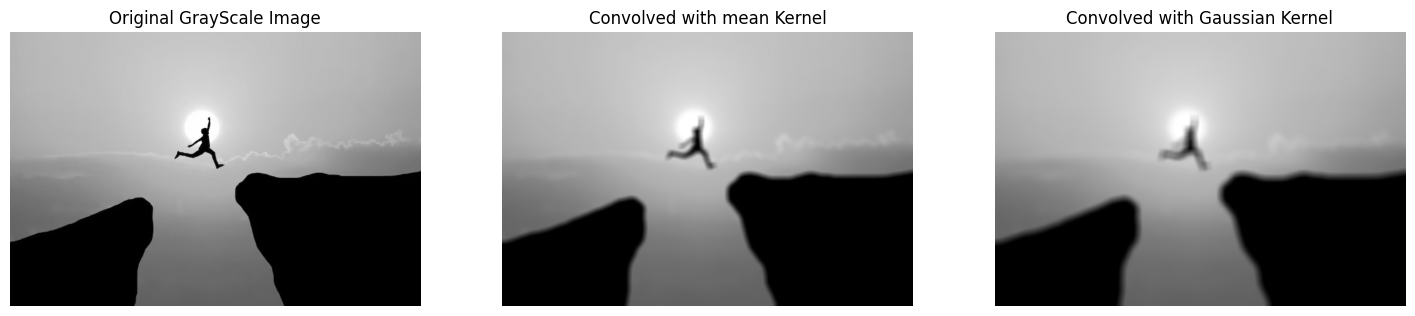

In [66]:
# Writing the convolution function

def convolve(image, kernel):
    # Get the dimensions of the image and kernel
    img_height, img_width = image.shape[0], image.shape[1]
    kernel_size = kernel.shape[0]

    # calculating the padding amount
    # for k x k kernel , padding p = (k - 1)/2
    padding_amount = kernel_size // 2

    # initializing the output image as zeros
    output_img = np.zeros_like(image, dtype=np.float32)

    pad_width = ((padding_amount, padding_amount), (padding_amount, padding_amount))

    padded_img = np.pad(image, pad_width=pad_width, mode='reflect')

    # iterating over each pixel of the original image
    for i in range(img_height):
      for j in range(img_width):

        patch = padded_img[i:i + kernel_size, j:j + kernel_size]

        output_value = np.sum(patch * kernel)
        output_img[i, j] = output_value

    return output_img

mean_kernel_11 = np.ones((11, 11), dtype=np.float32) / 121
mean_kernel_16 = np.ones((16, 16), dtype=np.float32) / 256

img_gray = img_gray.astype(np.float32)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original GrayScale Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(convolve(img_gray, mean_kernel_11), cmap='gray')
plt.title('Convolved with mean Kernel')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(convolve(img_gray, mean_kernel_16), cmap='gray')
plt.title('Convolved with Gaussian Kernel')
plt.axis('off')
plt.show()


Task 2 - Average Blur

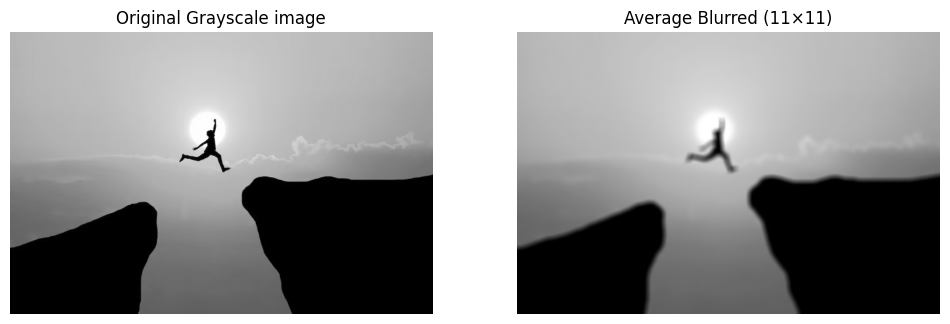

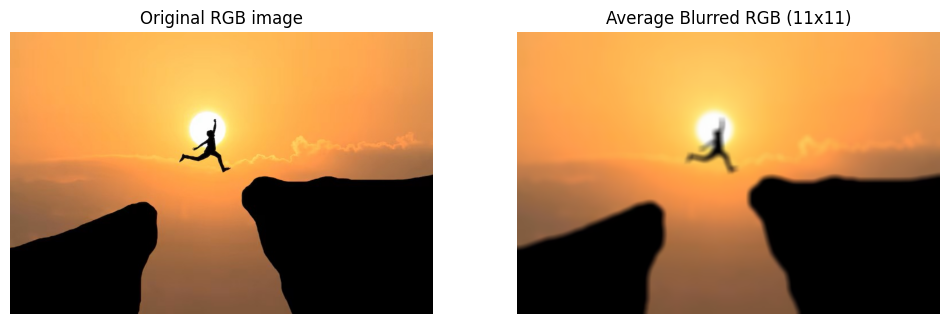

In [67]:
def average_blur_gray(img, ksize):

    # Confirming that kernel size must be odd
    assert ksize % 2 == 1

    img = img.astype(np.float32)

    # Creating box kernel
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)

    h, w = img.shape
    pad = ksize // 2

    # Padding the image
    padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='reflect')

    # initializing the Output image
    output = np.zeros_like(img, dtype=np.float32)

    # Convolution loop
    for i in range(h):
        for j in range(w):
            patch = padded_img[i:i+ksize, j:j+ksize]
            output[i, j] = np.sum(patch * kernel)

    return output


# Avgerage blur function for RGB images
def average_blur_rgb(img, ksize):

    assert ksize % 2 == 1

    # Spliting channels
    R = average_blur_gray(img[:, :, 0], ksize)
    G = average_blur_gray(img[:, :, 1], ksize)
    B = average_blur_gray(img[:, :, 2], ksize)

    blurred_rgb = np.stack([R, G, B], axis=2)

    return blurred_rgb.astype(np.uint8)


blur_gray = average_blur_gray(img_gray, ksize=11)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur_gray, cmap='gray')
plt.title("Average Blurred (11×11)")
plt.axis('off')
plt.show()

blur_rgb = average_blur_rgb(img_rgb, ksize=11)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original RGB image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur_rgb)
plt.title("Average Blurred RGB (11x11)")
plt.axis('off')
plt.show()


Task 3 - Gaussian Blur

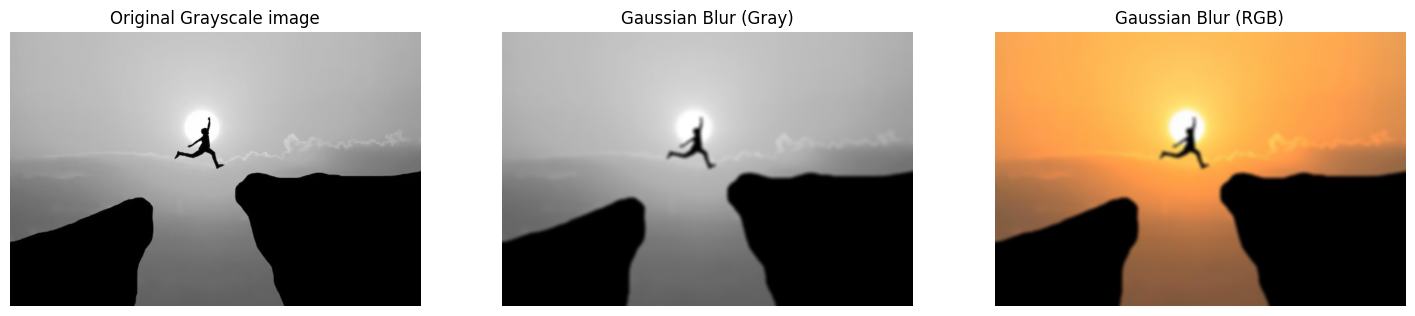

In [68]:
# writing the gaussian kernel function
def gaussian_kernel(ksize, sigma):

    # finding kernel center
    center = ksize // 2

    kernel = np.zeros((ksize, ksize), dtype=np.float32)

    coeff = 1 / (2 * np.pi * sigma * sigma)

    for i in range(ksize):
        for j in range(ksize):
            x = i - center
            y = j - center
            kernel[i, j] = coeff * np.exp(-(x*x + y*y) / (2 * sigma * sigma))

    # Normalizing kernel
    kernel = kernel / np.sum(kernel)

    return kernel

# generating gaussian kernel
g_kernel = gaussian_kernel(ksize=11, sigma=3)
gaussian_blur_gray = convolve(img_gray, g_kernel)

# Applying the kernel on each channal of a RGB image
def gaussian_blur_rgb(img, kernel):

    R = convolve(img[:, :, 0].astype(np.float32), kernel)
    G = convolve(img[:, :, 1].astype(np.float32), kernel)
    B = convolve(img[:, :, 2].astype(np.float32), kernel)

    blurred_rgb = np.stack([R, G, B], axis=2)

    return blurred_rgb.astype(np.uint8)

gaussian_blur_color = gaussian_blur_rgb(img_rgb, g_kernel)

# plotting the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur_gray, cmap='gray')
plt.title("Gaussian Blur (Gray)")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur_color)
plt.title("Gaussian Blur (RGB)")
plt.axis('off')
plt.show()


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [69]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

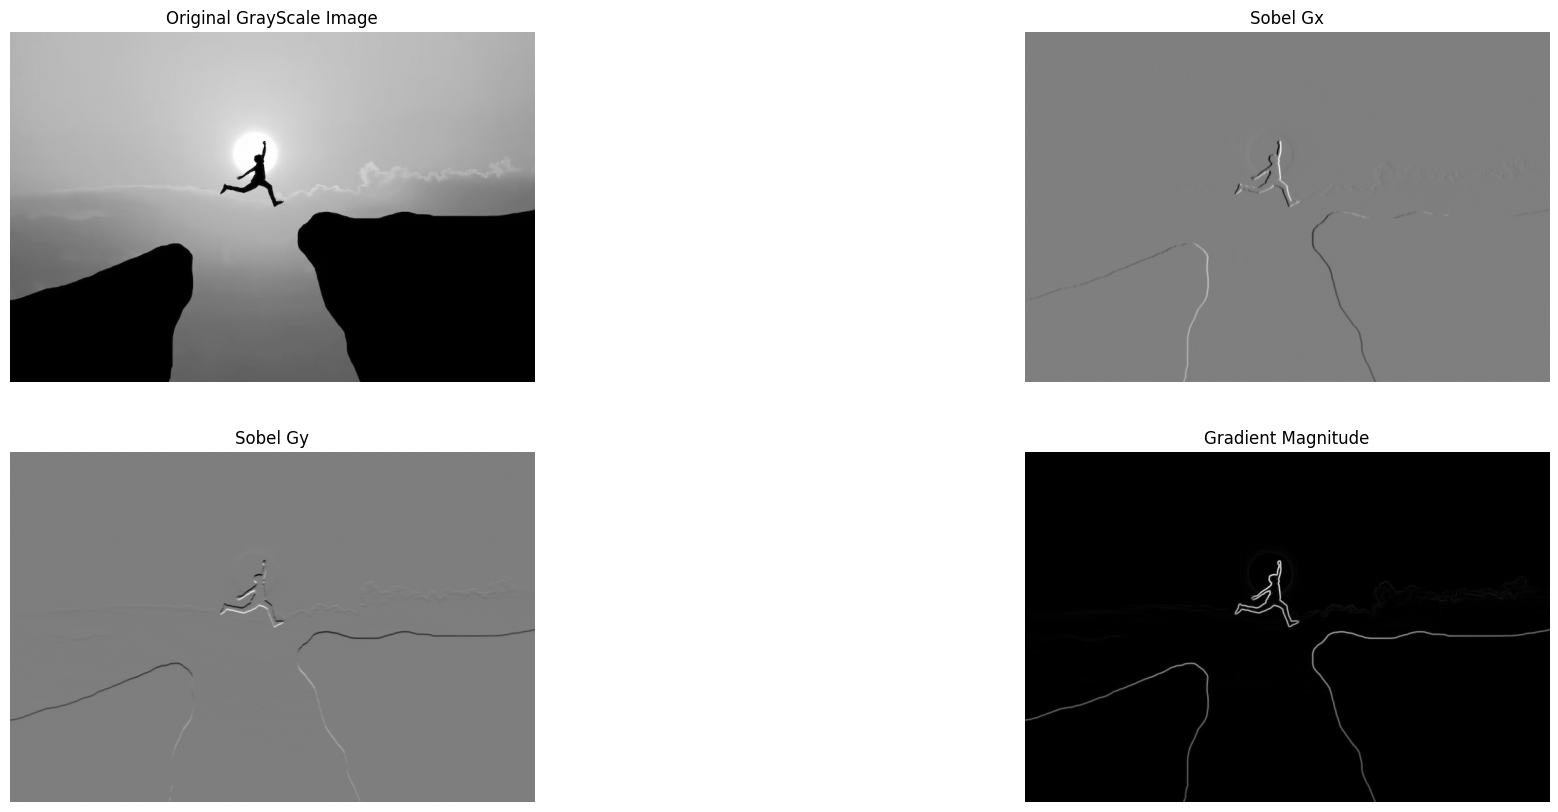

In [70]:
# Writing the sobel kernels
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=np.float32)

# Applying the kernels on the image
Gx = convolve(img_gray, sobel_x)
Gy = convolve(img_gray, sobel_y)

# Calculating the gradient magnitude
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# Normalising
gradient_norm = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))
gradient_norm = (gradient_norm * 255).astype(np.uint8)

# plotting
plt.figure(figsize=(24, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original GrayScale Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Sobel Gx')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Sobel Gy')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(gradient_norm, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [71]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Task 1 - Laplacian Sharpening ( Only Numpy and Grayscale )

Maximum difference: 0


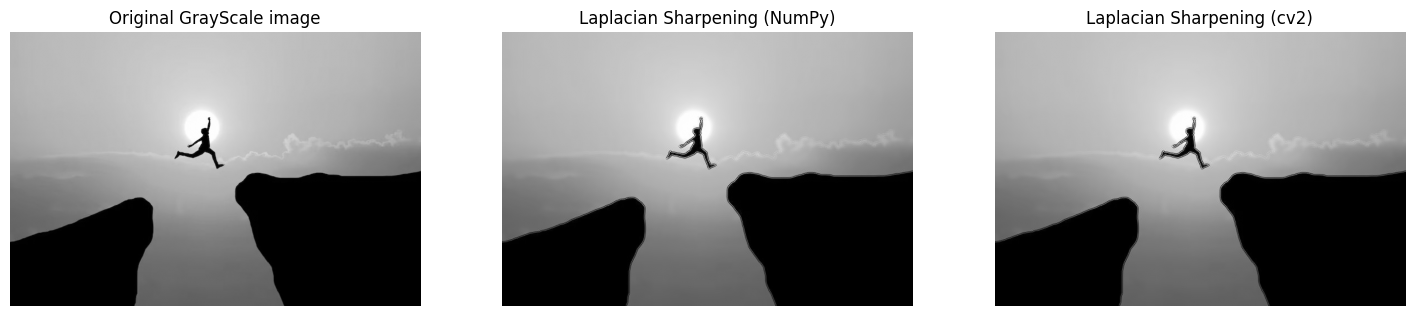

In [72]:
# Laplacian kernel
laplacian_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

lap_np = convolve(img_gray, laplacian_kernel)

alpha = 1.0
sharp_np = img_gray + alpha*lap_np
sharp_np = np.clip(sharp_np, 0, 255).astype(np.uint8)

# cv2 version
lap_cv = cv2.Laplacian(img_gray.astype(np.uint8), cv2.CV_32F)
sharp_cv = np.clip(img_gray + lap_cv, 0, 255).astype(np.uint8)

# verifing both outputs
difference = np.abs(sharp_np.astype(np.int16) - sharp_cv.astype(np.int16))
print("Maximum difference:", difference.max())

# displaying the results
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original GrayScale image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sharp_np, cmap='gray')
plt.title("Laplacian Sharpening (NumPy)")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(sharp_cv, cmap='gray')
plt.title("Laplacian Sharpening (cv2)")
plt.axis('off')
plt.show()



Task 2 - Unsharp Masking ( Only Numpy and Grayscale )

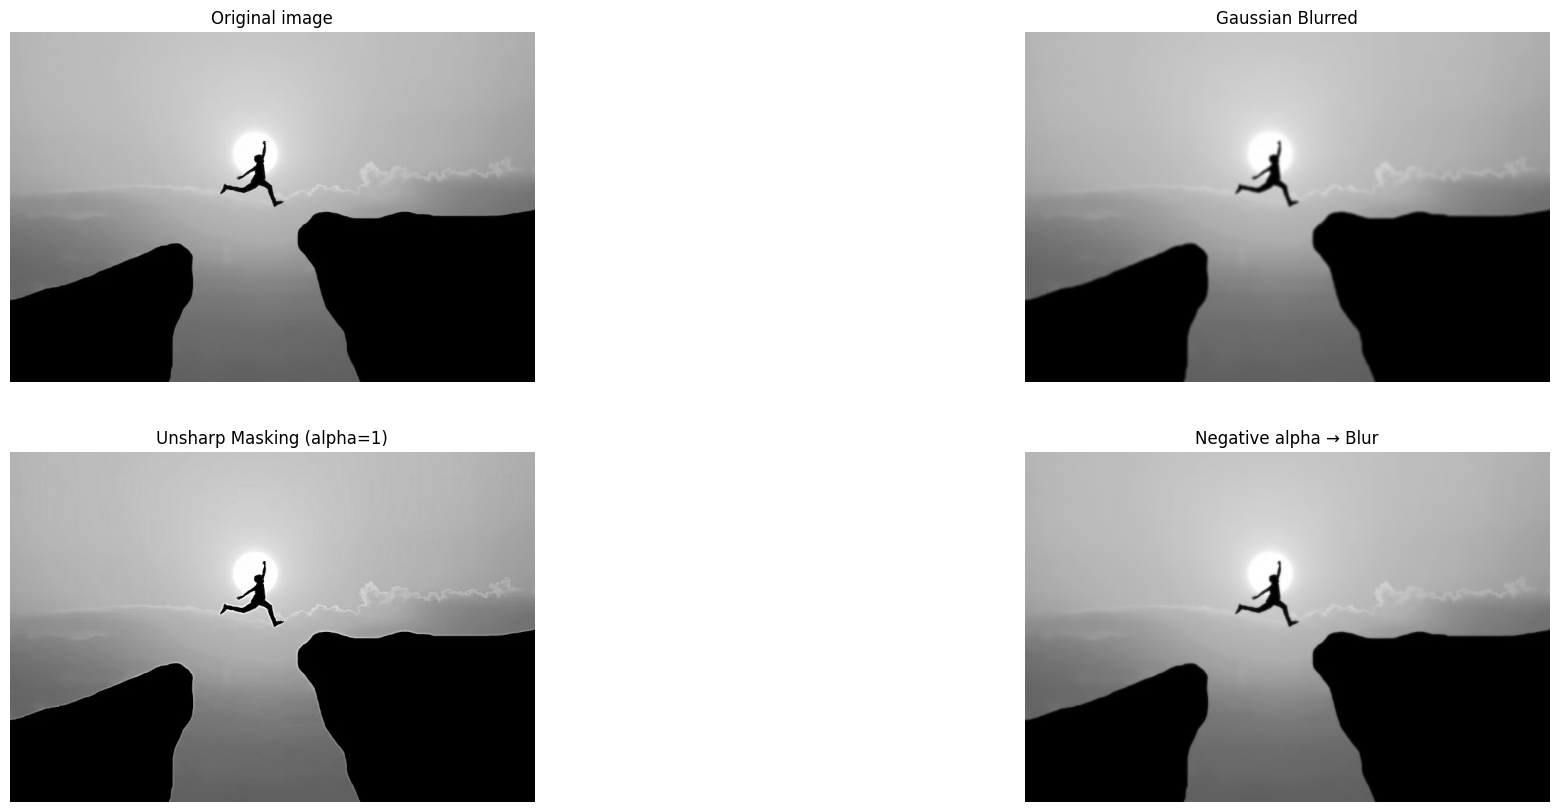

In [73]:
# Applying Gaussian blur
ksize = 7
sigma = 1.5
g_kernel = gaussian_kernel(ksize, sigma)
blurred = convolve(img_gray, g_kernel)

# Computing high-frequency mask
mask = img_gray - blurred

# Unsharp masking (sharpening)
alpha = 1.0
sharp = img_gray + alpha * mask

# Negative alpha produces additional blurring
alpha_neg = -0.5
blur_from_unsharp = img_gray + alpha_neg * mask

blurred = np.clip(blurred, 0, 255).astype(np.uint8)
sharp = np.clip(sharp, 0, 255).astype(np.uint8)
blur_from_unsharp = np.clip(blur_from_unsharp, 0, 255).astype(np.uint8)

# Plotting the results
plt.figure(figsize=(24, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sharp, cmap='gray')
plt.title("Unsharp Masking (alpha=1)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(blur_from_unsharp, cmap='gray')
plt.title("Negative alpha → Blur")
plt.axis('off')

plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [74]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

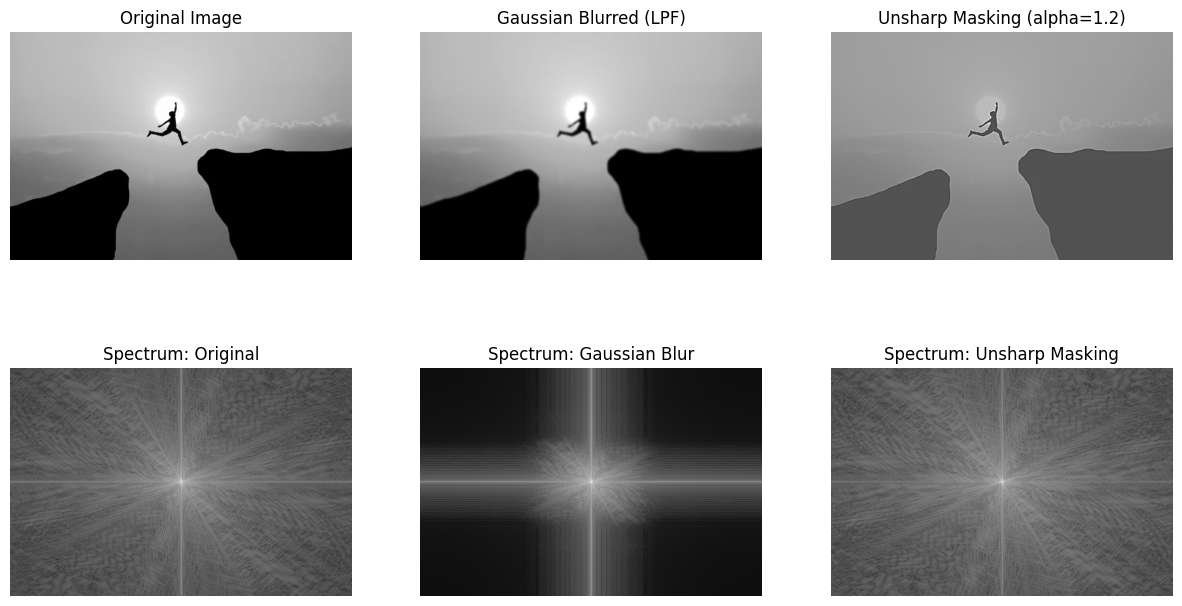

'The magnitude spectrum shows that blurring kernels suppress high-frequency components, confirming that convolution with average or Gaussian kernels behaves as a low-pass frequency filter.'

In [75]:
# Magnitude spectrum
def magnitude_spectrum(img):

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude = np.log(1 + np.abs(fft_shift))
    return magnitude

ksize = 9
sigma = 2.0 # larger sigma -> stronger low-pass filtering
alpha = 1.2 # larger alpha -> stronger high-frequency boost


# Gaussian Blur (LPF)
g_kernel = gaussian_kernel(ksize, sigma)
blurred = convolve(img_gray, g_kernel)

# Unsharp Masking (HPF boost)
mask = img_gray - blurred
sharp = img_gray + alpha * mask

# Computing magnitude spectra
spec_orig = magnitude_spectrum(img_gray)
spec_blur = magnitude_spectrum(blurred)
spec_sharp = magnitude_spectrum(sharp)

# plotting the results
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred (LPF)")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(sharp, cmap='gray')
plt.title(f"Unsharp Masking (alpha={alpha})")
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(spec_orig, cmap='gray')
plt.title("Spectrum: Original")
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(spec_blur, cmap='gray')
plt.title("Spectrum: Gaussian Blur")
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(spec_sharp, cmap='gray')
plt.title("Spectrum: Unsharp Masking")
plt.axis('off')
plt.show()

'''The magnitude spectrum shows that blurring kernels suppress high-frequency components, confirming that convolution with average or Gaussian kernels behaves as a low-pass frequency filter.'''



### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

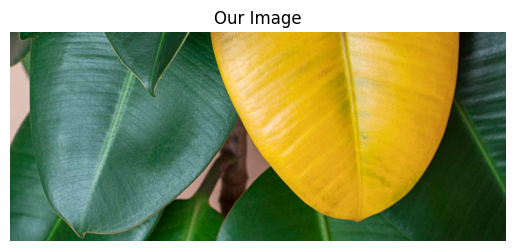

In [76]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [77]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

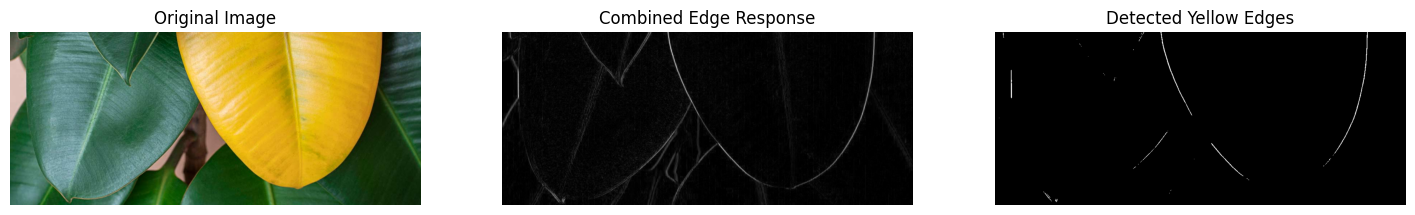

In [78]:
# Converting image to float for processing
img_float = img_part5.astype(np.float32)

# Separating RGB channels
red_channel   = img_float[:, :, 0]
green_channel = img_float[:, :, 1]
blue_channel  = img_float[:, :, 2]

# using Sobel edge kernel
sobel_kernel = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)

# Computing edge responses for individual channels
edge_red   = convolve(red_channel, sobel_kernel)
edge_green = convolve(green_channel, sobel_kernel)

# Computing color difference image (R - G)
red_green_diff = red_channel - green_channel

# Edge response on the color difference
edge_diff = convolve(red_green_diff, sobel_kernel)

# Combining all edge responses
edge_combined = (
    np.abs(edge_red) +
    np.abs(edge_green) +
    2 * np.abs(edge_diff)
)

# Normalizing combined edge map to 0–255
edge_combined /= np.max(edge_combined)
edge_combined = (edge_combined * 255).astype(np.uint8)

# Binary thresholding for clean edges
edge_binary = np.zeros_like(edge_combined)
edge_binary[edge_combined > 100] = 255

# plotting the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_part5.astype(np.uint8))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(edge_combined, cmap="gray")
plt.title("Combined Edge Response")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(edge_binary, cmap="gray")
plt.title("Detected Yellow Edges")
plt.axis("off")
plt.show()


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
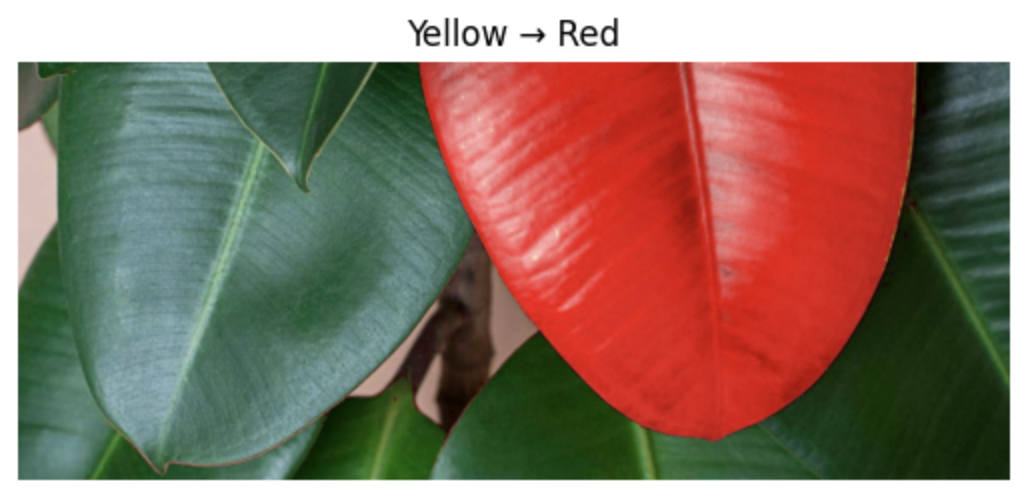

Also, we can change to a less brighter colour
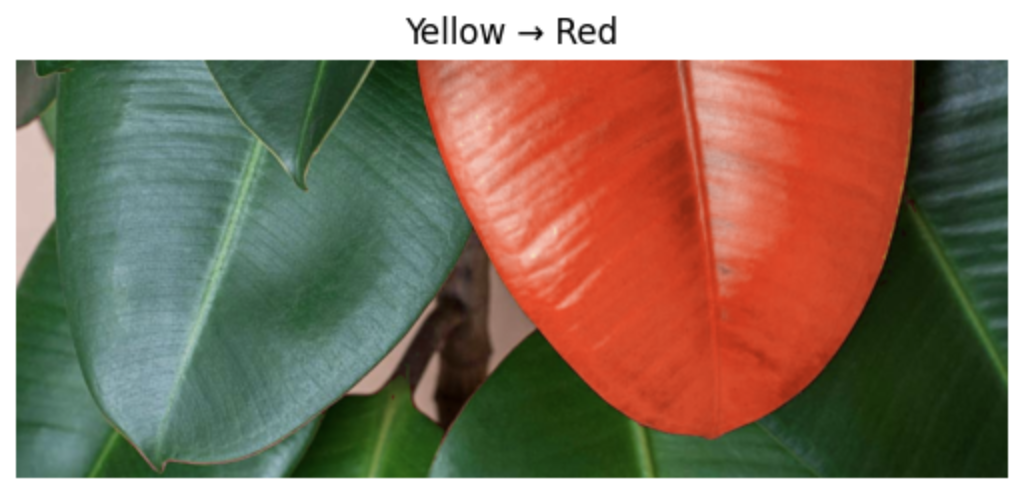

In [79]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

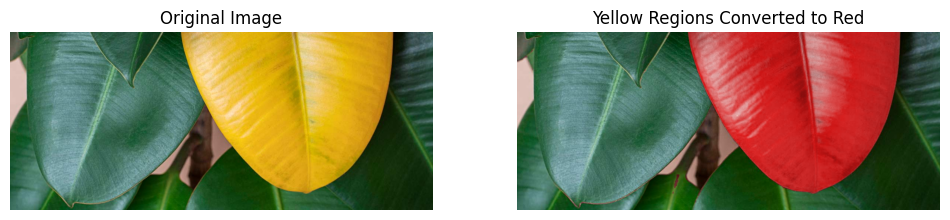

In [80]:
# Converting RGB to HSV:-
def convert_rgb_to_hsv(rgb_img):
    rgb = rgb_img.astype(np.float32) / 255.0

    r = rgb[:, :, 0]
    g = rgb[:, :, 1]
    b = rgb[:, :, 2]

    max_val = np.maximum(np.maximum(r, g), b)
    min_val = np.minimum(np.minimum(r, g), b)
    diff = max_val - min_val

    hue = np.zeros_like(max_val)

    non_zero = diff > 0

    idx = (max_val == r) & non_zero
    hue[idx] = (60 * ((g[idx] - b[idx]) / diff[idx]) + 360) % 360

    idx = (max_val == g) & non_zero
    hue[idx] = 60 * ((b[idx] - r[idx]) / diff[idx]) + 120

    idx = (max_val == b) & non_zero
    hue[idx] = 60 * ((r[idx] - g[idx]) / diff[idx]) + 240

    sat = np.zeros_like(max_val)
    sat[max_val != 0] = diff[max_val != 0] / max_val[max_val != 0]

    val = max_val

    return np.dstack((hue, sat, val))


# Converting HSV back to RGB
def convert_hsv_to_rgb(hsv_img):
    h = hsv_img[:, :, 0]
    s = hsv_img[:, :, 1]
    v = hsv_img[:, :, 2]

    chroma = v * s
    h_sector = h / 60.0
    x = chroma * (1 - np.abs(h_sector % 2 - 1))
    m = v - chroma

    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)

    cond = [
        (0 <= h) & (h < 60),
        (60 <= h) & (h < 120),
        (120 <= h) & (h < 180),
        (180 <= h) & (h < 240),
        (240 <= h) & (h < 300),
        (300 <= h) & (h < 360)
    ]

    r[cond[0]], g[cond[0]], b[cond[0]] = chroma[cond[0]], x[cond[0]], 0
    r[cond[1]], g[cond[1]], b[cond[1]] = x[cond[1]], chroma[cond[1]], 0
    r[cond[2]], g[cond[2]], b[cond[2]] = 0, chroma[cond[2]], x[cond[2]]
    r[cond[3]], g[cond[3]], b[cond[3]] = 0, x[cond[3]], chroma[cond[3]]
    r[cond[4]], g[cond[4]], b[cond[4]] = x[cond[4]], 0, chroma[cond[4]]
    r[cond[5]], g[cond[5]], b[cond[5]] = chroma[cond[5]], 0, x[cond[5]]

    rgb = np.stack((r + m, g + m, b + m), axis=2)
    return (rgb * 255).astype(np.uint8)


# Converting the image
hsv_img = convert_rgb_to_hsv(img_part5)

h = hsv_img[:, :, 0]
s = hsv_img[:, :, 1]
v = hsv_img[:, :, 2]

# Detecting yellow regions
yellow_region = (
    (h > 30) & (h < 80) &
    (s > 0.25) &
    (v > 0.3)
)

r_ch = img_part5[:, :, 0].astype(np.float32) / 255.0
b_ch = img_part5[:, :, 2].astype(np.float32) / 255.0

yellow_region = yellow_region & (r_ch > b_ch)

# Modifing color (yellow → red)
h[yellow_region] = 0
s[yellow_region] = np.clip(s[yellow_region] * 0.9, 0, 1)
v[yellow_region] = np.clip(v[yellow_region] * 0.9, 0, 1)

hsv_out = np.dstack((h, s, v))

# Converting back to RGB
final_img = convert_hsv_to_rgb(hsv_out)

# plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_part5)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(final_img)
plt.title("Yellow Regions Converted to Red")
plt.axis("off")
plt.show()
